<a href="https://colab.research.google.com/github/sebastiansossah/deepLearning_first_project/blob/main/clasifying_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a example of binary classification (this is the most widely applied kind of machine-learning problem) 

In this example we going to classify movie reviews as positive or negative

##Seting the data

In [ ]:
import pandas as pd
import json

In [ ]:
from keras.datasets import imdb

In [ ]:
# the argument num_words= 10000 means you will only keep the top 10.000 most frequently ocurring words in the training
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
#Test data variable contains a list of review, each review is a list of word indices
print(test_data[:5])

[list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717])
 list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 4, 65, 55, 73

In [ ]:
# The variable test_labels contain a set of 0 and 1 where 0 is negative and 1 positive
print(len(test_labels))
print(test_labels)


25000
[0 1 1 ... 0 0 0]


###Decoding the word on english words

In [ ]:
#word index is is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
reverse_word_index = dict(
    #Reverses it, mappping integer indices to words
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    #Decodes the review
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

##Preparing the data 

You cant feed a list of integer on a neural network, you have to turn your list insto tensors

In this case we going to use one-hot encode, wich turn the sequence [3, 5] into a 10.000 dimensional vector that would be all 0 except for the indices 3 and 5 wich would be 1

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  #Creates an all-zero matrix with the shape of sequence and dimension
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    #Set specific indices of results
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print(x_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [ ]:
y_train = np.asanyarray(train_labels).astype('float32')
y_test = np.asanyarray(test_labels).astype('float32')

In [ ]:
print(y_train)

[1. 0. 0. ... 0. 1. 0.]


##Building the network

In [ ]:
from keras import models
from keras import layers 

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

##Compeling the model 

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics

In [ ]:
model.compile(optimizer='rmsprop',
                 loss='ninary_crossentropy',
                 metrics=['accuracy'])

###Configuring the optimizer

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Validating the approach 
In order to monitor the accuracy during training, we will create a validation set by setting appart 10.000 samples from the original training data 

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

##Training the model 

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5030 - acc: 0.7861 - val_loss: 0.3790 - val_acc: 0.8670
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2956 - acc: 0.9043 - val_loss: 0.3004 - val_acc: 0.8882
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2142 - acc: 0.9309 - val_loss: 0.3293 - val_acc: 0.8668
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1705 - acc: 0.9445 - val_loss: 0.2760 - val_acc: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1392 - acc: 0.9557 - val_loss: 0.2835 - val_acc: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1148 - acc: 0.9635 - val_loss: 0.2995 - val_acc: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0936 - acc: 0.9715 - val_loss: 0.3157 - val_acc: 0.8834
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0754 - a

What happend during the training?

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

##Plotting the training and validation loss

In [ ]:
import matplotlib.pyplot as plt

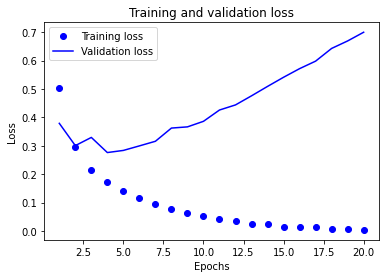

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plotting the training and validation accuracy

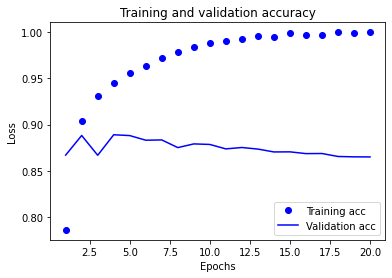

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As we can see the training loss decreases with every epoch, and the training accuracy increase with every epoch. Thats what we wolud expected with gradient **descent optimization** the quantity you are trying to minimize should be less with every iteration

however this isent the case with the validation loss and accuracy, this is a clear example of overfitting, after the second epoch we are optimizing on the training data, ad we end up learnin representation that **are specific to the trainig data** and dont generalize to data outside of the training set

**In this case to prevent overfitting, we could stop training after trhee epchs**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.4466 - accuracy: 0.8297
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2604 - accuracy: 0.9097
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2007 - accuracy: 0.9308
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3103 - accuracy: 0.8771


## Predicting
After we trained the data we will use in a pratical setting using our testing data 

In [ ]:
accuracy_test = model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


In [ ]:
print('The mean accuracy of the test is: '  +  str(np.mean(accuracy_test)))

The mean accuracy of the test is: 0.5458475


# Adding one more layer to the model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
                 loss='ninary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 37ms/step - loss: 0.1389 - acc: 0.9551 - val_loss: 0.3873 - val_acc: 0.8596
Epoch 2/4
30/30 [==============================] - 1s 33ms/step - loss: 0.0971 - acc: 0.9707 - val_loss: 0.3224 - val_acc: 0.8829
Epoch 3/4
30/30 [==============================] - 1s 34ms/step - loss: 0.0769 - acc: 0.9799 - val_loss: 0.3514 - val_acc: 0.8792
Epoch 4/4
30/30 [==============================] - 1s 36ms/step - loss: 0.0650 - acc: 0.9816 - val_loss: 0.4281 - val_acc: 0.8660


In [ ]:
accuracy_test1 = model.predict(x_test)
print(np.mean(accuracy_test1))

782/782 [==============================] - 1s 2ms/step
0.4204264


# Using more hidden units (32)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 55ms/step - loss: 0.4833 - acc: 0.7802 - val_loss: 0.3374 - val_acc: 0.8789
Epoch 2/4
30/30 [==============================] - 1s 47ms/step - loss: 0.2765 - acc: 0.9015 - val_loss: 0.3089 - val_acc: 0.8739
Epoch 3/4
30/30 [==============================] - 1s 40ms/step - loss: 0.1977 - acc: 0.9317 - val_loss: 0.2760 - val_acc: 0.8913
Epoch 4/4
30/30 [==============================] - 1s 40ms/step - loss: 0.1559 - acc: 0.9467 - val_loss: 0.2803 - val_acc: 0.8900


In [ ]:
accuracy_test2 = model.predict(x_test)
print(np.mean(accuracy_test2))

782/782 [==============================] - 2s 2ms/step
0.506078


#Changin the loss function used

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
                 loss='mse',
                 metrics=['accuracy'])

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 58ms/step - loss: 0.0385 - acc: 0.9517 - val_loss: 0.0862 - val_acc: 0.8856
Epoch 2/4
30/30 [==============================] - 1s 44ms/step - loss: 0.0252 - acc: 0.9714 - val_loss: 0.0897 - val_acc: 0.8809
Epoch 3/4
30/30 [==============================] - 1s 45ms/step - loss: 0.0190 - acc: 0.9800 - val_loss: 0.0938 - val_acc: 0.8770
Epoch 4/4
30/30 [==============================] - 1s 45ms/step - loss: 0.0147 - acc: 0.9851 - val_loss: 0.1016 - val_acc: 0.8705


In [ ]:
accuracy_test3 = model.predict(x_test)
print(np.mean(accuracy_test3))

782/782 [==============================] - 2s 2ms/step
0.55802494


# Using tanh function on activation function

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
                 loss='mse',
                 metrics=['accuracy'])

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 3s 79ms/step - loss: 0.1525 - acc: 0.7866 - val_loss: 0.1185 - val_acc: 0.8359
Epoch 2/4
30/30 [==============================] - 2s 60ms/step - loss: 0.0705 - acc: 0.9119 - val_loss: 0.0820 - val_acc: 0.8905
Epoch 3/4
30/30 [==============================] - 2s 58ms/step - loss: 0.0508 - acc: 0.9358 - val_loss: 0.1099 - val_acc: 0.8519
Epoch 4/4
30/30 [==============================] - 2s 56ms/step - loss: 0.0382 - acc: 0.9527 - val_loss: 0.0978 - val_acc: 0.8735


In [ ]:
accuracy_test3 = model.predict(x_test)
print(np.mean(accuracy_test3))

782/782 [==============================] - 5s 6ms/step
0.56782746
